In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("outputTunisianet.csv", na_values="?" )

In [3]:
df

,brand,price,reference,title
0,https://www.tunisianet.com.tn/270_versus,"439,000 DT",[VBOOK14SLVV1.],Pc portable Versus V-Book / Quad Core / 2 Go
1,https://www.tunisianet.com.tn/3_lenovo,"839,000 DT",[81D600DDFE],Pc Portable Lenovo IdeaPad 330-15AST / Dual Co...
2,https://www.tunisianet.com.tn/3_lenovo,"889,000 DT",[82C6006GFE],PC Portable Lenovo V14 ADA / Dual Core / 4 Go
3,https://www.tunisianet.com.tn/79_asus,"899,000 DT",[X543NA-AR297T],Pc portable Asus X543NA / Dual Core / 4 Go / Gris
4,https://www.tunisianet.com.tn/3_lenovo,"902,000 DT",[81D600DDFE-8],Pc Portable Lenovo IdeaPad 330-15AST / Dual Co...
...,...,...,...,...
1640,https://www.tunisianet.com.tn/874_swatch,"345,000 DT",[YLS216],Montre Pour Femme Swatch LOVELY LILAC YLS216
1641,https://www.tunisianet.com.tn/874_swatch,"345,000 DT",[YLS217],Montre Pour Femme Swatch STARRY PARTY YLS217
1642,https://www.tunisianet.com.tn/874_swatch,"345,000 DT",[YLS220],Montre pour femme Swatch Rose Sparkle YLS220
1643,https://www.tunisianet.com.tn/874_swatch,"360,000 DT",[SFK389GA],Montre Pour femme Swatch INCANTATA SFK389GA / ...


In [4]:
df.dtypes

brand        object
price        object
reference    object
title        object
dtype: object

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()

In [6]:
obj_df.head()

,brand,price,reference,title
0,https://www.tunisianet.com.tn/270_versus,"439,000 DT",[VBOOK14SLVV1.],Pc portable Versus V-Book / Quad Core / 2 Go
1,https://www.tunisianet.com.tn/3_lenovo,"839,000 DT",[81D600DDFE],Pc Portable Lenovo IdeaPad 330-15AST / Dual Co...
2,https://www.tunisianet.com.tn/3_lenovo,"889,000 DT",[82C6006GFE],PC Portable Lenovo V14 ADA / Dual Core / 4 Go
3,https://www.tunisianet.com.tn/79_asus,"899,000 DT",[X543NA-AR297T],Pc portable Asus X543NA / Dual Core / 4 Go / Gris
4,https://www.tunisianet.com.tn/3_lenovo,"902,000 DT",[81D600DDFE-8],Pc Portable Lenovo IdeaPad 330-15AST / Dual Co...


In [7]:
obj_df[obj_df.isnull().any(axis=1)]

,brand,price,reference,title


In [8]:
obj_df["reference"].value_counts()

[A3121H11]            4
[MAG272C]             3
[1FR84AS.]            2
[81W800T8FG-20]       2
[G1S0001VF-WH]        2
                     ..
[ITEL-2160-DB]        1
[NSS-19054BK]         1
[S509JB-EJ010T-20]    1
[5410I5-512-3Y-16]    1
[ACTPD00002A]         1
Name: reference, Length: 1320, dtype: int64

In [9]:
ord_enc = OrdinalEncoder()

In [10]:
obj_df["ref_code"] = ord_enc.fit_transform(obj_df[["reference"]])

In [11]:
obj_df[["reference", "ref_code"]].head(5)

,reference,ref_code
0,[VBOOK14SLVV1.],1230.0
1,[81D600DDFE],267.0
2,[82C6006GFE],307.0
3,[X543NA-AR297T],1266.0
4,[81D600DDFE-8],266.0


In [12]:
obj_df.dtypes

brand         object
price         object
reference     object
title         object
ref_code     float64
dtype: object

In [13]:
# Subdiviser les échantillons d'observations en sous-ensembles d'apprentissage et de test
X_train, X_test=train_test_split(obj_df[["ref_code"]], test_size= 0.2, random_state=5)

In [18]:
inertia = []
K = range(1, 90)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    inertia.append(km.inertia_)
    
print(inertia)

[184839405.84802428, 47811887.66301174, 20940597.12144954, 12286285.64064387, 7832403.544102905, 5294194.466063065, 3866374.0200002016, 2987593.93472458, 2312128.2052264335, 1826812.7484558125, 1512350.557633093, 1308516.5498858644, 1097976.2000385802, 932744.2344611149, 816563.2873090883, 705447.8790605804, 620105.5177546984, 563896.9914660567, 504622.5124189715, 454000.9286788004, 418186.77694475185, 380118.6239018592, 349921.36508002534, 319299.7475511672, 294681.18626140297, 273051.8231192674, 253556.5490939993, 232990.79524475144, 217007.19444591142, 207269.19942792592, 191758.38160748692, 183803.33990267295, 169359.70176908537, 157035.96052849552, 151820.64541522166, 140960.83781176535, 134088.29701471629, 128260.59351006763, 120681.66439027585, 113891.24316733304, 108364.55845805873, 104572.28274271195, 98301.46351146688, 93771.55648603996, 88613.46359057637, 86259.94724252602, 82743.82942819051, 77395.08016348393, 76436.8615873286, 73328.69499493415, 70301.01338238244, 67842.72

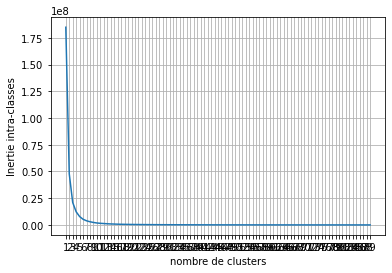

In [19]:
plt.plot(K, inertia)
plt.xticks(K)
plt.xlabel('nombre de clusters')
plt.ylabel('Inertie intra-classes')
plt.grid(True)

In [25]:
model=KMeans(n_clusters=4)

In [26]:
model.fit(X_train)

KMeans(n_clusters=4)

In [27]:
model.cluster_centers_

array([[1128.55585831],
       [ 162.27508091],
       [ 791.63580247],
       [ 483.54113924]])

In [28]:
y_Train_pred = model.labels_
print(y_Train_pred)

[3 0 0 ... 1 1 3]


In [29]:
model.inertia_ 

12279225.746454693

In [30]:
- model.score(X_test)

2983691.6139573655

In [31]:
y_kmeans4=model.fit_predict(X_test)

In [32]:
print(y_kmeans4)

[3 0 2 3 2 1 3 1 0 1 0 0 3 1 1 2 2 3 3 2 1 3 1 0 3 3 0 0 2 0 1 1 0 1 3 2 2
 0 3 3 2 3 2 3 0 0 0 3 2 1 1 1 3 2 1 0 2 2 1 2 1 0 0 2 3 3 0 1 1 1 0 3 3 1
 2 2 2 0 0 2 2 2 0 0 1 2 2 0 1 2 0 3 3 3 1 0 0 0 0 0 0 2 0 3 0 2 0 2 2 0 3
 2 2 0 1 2 0 1 0 2 2 1 3 0 3 0 3 0 2 0 3 1 0 1 1 3 3 1 3 3 2 0 1 1 0 3 0 3
 0 0 2 0 2 1 3 0 1 1 1 2 2 0 0 1 3 1 3 0 0 3 2 2 3 0 1 2 2 1 2 0 2 1 0 1 2
 2 3 0 3 3 2 2 0 1 1 1 3 2 2 3 0 2 0 1 0 2 0 0 2 3 0 1 1 2 2 3 2 2 2 3 0 3
 0 3 3 3 1 0 3 3 0 2 0 2 2 2 3 2 2 1 0 3 3 0 2 2 0 2 1 1 0 2 3 1 0 2 3 1 0
 2 0 3 3 2 1 3 1 0 2 1 1 1 3 1 3 2 1 3 1 2 0 2 3 1 1 1 2 1 1 2 0 0 1 1 3 3
 3 1 0 3 2 3 1 0 2 2 2 3 3 1 2 3 0 0 2 3 0 2 2 2 3 0 2 1 2 3 0 0 3]


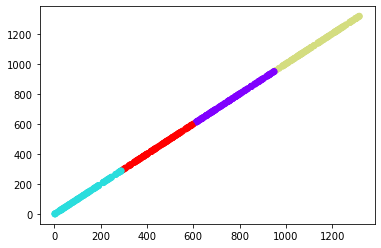

In [33]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,0],c=y_kmeans4,cmap='rainbow')

In [34]:
from sklearn.metrics import classification_report

In [35]:
X_test

,ref_code
1289,513.0
184,655.0
1279,1232.0
315,380.0
236,1309.0
...,...
814,1120.0
383,345.0
386,716.0
668,748.0
